In [1]:
import numpy as np
from scipy.linalg import expm
import matplotlib.pyplot as plt

In [ ]:
#This cell builds the Hamiltonian from the lanc coeffs


N = 300  # Krylov dimension
a = np.ones(N)           # diagonal terms
b = np.ones(N) * 0.5      # 1 off diagonal terms (b[0] is unused)
#b[0]=0 in convention but thats not necessary for making H

#making the krylov hamiltonian
Hk = np.zeros((N, N), dtype=complex)
for n in range(N):
    Hk[n, n] = a[n]
    if n + 1 < N:
        Hk[n, n+1] = b[n+1]
        Hk[n+1, n] = b[n+1]

In [ ]:
#Here we set the initial state in krylov basis (v_0)

psi0 = np.zeros(N, dtype=complex)
psi0[0] = 1.0

In [ ]:
#Here we time evolve it and compute the k complexity at each time step
#we do the same for shanon entropy out of interest, though I dont believe time is an important parameter for it


T = 500      # total time
steps = 500
times = np.linspace(0, T, steps)
complexities = []
shanons =[]

for t in times:
    #built in matrix exponential function
    U = expm(-1j * Hk * t)
    psit = U.dot(psi0)
    ck = np.sum(np.arange(N)*psit*np.conjugate(psit))
    complexities.append(ck)

    sk=-1*np.sum( (psit*np.conjugate(psit)) * np.log(psit*np.conjugate(psit)) )
    shanons.append(sk)

/tmp/ipykernel_254/1327202040.py:15: RuntimeWarning: divide by zero encountered in log
  sk=-1*np.sum( (psit*np.conjugate(psit)) * np.log(psit*np.conjugate(psit)) )
/tmp/ipykernel_254/1327202040.py:15: RuntimeWarning: invalid value encountered in multiply
  sk=-1*np.sum( (psit*np.conjugate(psit)) * np.log(psit*np.conjugate(psit)) )


In [ ]:
print(complexities)
print(shanons)
print(ck)

/var/data/python/lib/python3.12/site-packages/matplotlib/cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/var/data/python/lib/python3.12/site-packages/matplotlib/cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


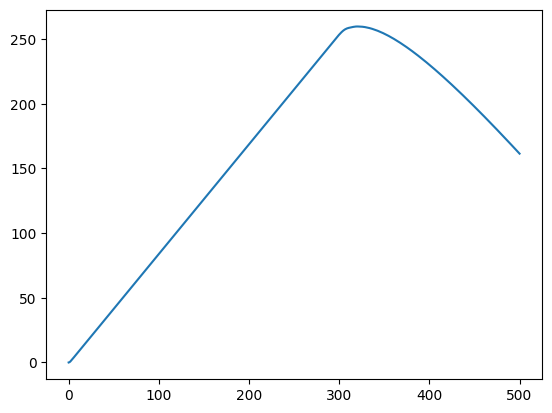

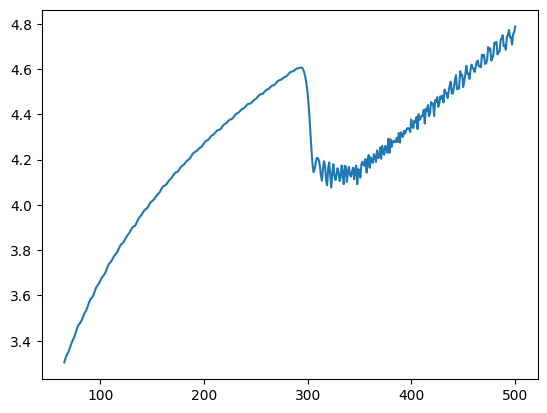

In [7]:

plt.plot(times, complexities)
plt.figure()
plt.plot(times,shanons)